<a href="https://colab.research.google.com/github/DN554/PROJECTS-FOR-CERTIFICATIONS/blob/main/FINANCIAL_ANALYSIS_NOTEBOOK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/Financial_Summary_Microsoft_Tesla_Apple.csv')
df

,Company,Fiscal Year Ending,Total Revenue (USD M),Net Income (USD M),Total Assets (USD M),Total Liabilities (USD M),Operating Cash Flow (USD M)
0,Microsoft,"June 30, 2022",198000,72700,364000.0,NaN,NaN
1,Microsoft,"June 30, 2023",211000,72300,411000.0,NaN,NaN
2,Microsoft,"June 30, 2024",245000,88100,512000.0,NaN,NaN
3,Tesla,"Dec 31, 2022",81462,12556,127855.0,NaN,NaN
4,Tesla,"Dec 31, 2023",96773,14997,140473.0,NaN,NaN
5,Tesla,"Dec 31, 2024",97690,7091,122070.0,125665.0,NaN
6,Apple,"Sept 24, 2022",394328,99803,NaN,352755.0,122151.0
7,Apple,"Sept 30, 2023",383000,96995,NaN,352583.0,110543.0
8,Apple,"Sept 28, 2024",391000,93736,NaN,NaN,118254.0


In [4]:
df['Revenue Growth (%)'] = df.groupby(['Company'])['Total Revenue (USD M)'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby(['Company'])['Net Income (USD M)'].pct_change() * 100

In [5]:
df

,Company,Fiscal Year Ending,Total Revenue (USD M),Net Income (USD M),Total Assets (USD M),Total Liabilities (USD M),Operating Cash Flow (USD M),Revenue Growth (%),Net Income Growth (%)
0,Microsoft,"June 30, 2022",198000,72700,364000.0,NaN,NaN,NaN,NaN
1,Microsoft,"June 30, 2023",211000,72300,411000.0,NaN,NaN,6.565657,-0.550206
2,Microsoft,"June 30, 2024",245000,88100,512000.0,NaN,NaN,16.113744,21.853389
3,Tesla,"Dec 31, 2022",81462,12556,127855.0,NaN,NaN,NaN,NaN
4,Tesla,"Dec 31, 2023",96773,14997,140473.0,NaN,NaN,18.795267,19.440905
5,Tesla,"Dec 31, 2024",97690,7091,122070.0,125665.0,NaN,0.947578,-52.717210
6,Apple,"Sept 24, 2022",394328,99803,NaN,352755.0,122151.0,NaN,NaN
7,Apple,"Sept 30, 2023",383000,96995,NaN,352583.0,110543.0,-2.872735,-2.813543
8,Apple,"Sept 28, 2024",391000,93736,NaN,NaN,118254.0,2.088773,-3.359967


In [7]:
company_group = df.groupby("Company").agg({
    "Total Revenue (USD M)": ["mean", "sum", "max"],
    "Net Income (USD M)": ["mean", "sum", "max"],
    "Operating Cash Flow (USD M)": ["mean", "sum", "max"]
})
company_group

Total Revenue (USD M)                  Net Income (USD M)          \
                           mean      sum     max               mean     sum   
Company                                                                       
Apple             389442.666667  1168328  394328       96844.666667  290534   
Microsoft         218000.000000   654000  245000       77700.000000  233100   
Tesla              91975.000000   275925   97690       11548.000000   34644   

                 Operating Cash Flow (USD M)                      
             max                        mean       sum       max  
Company                                                           
Apple      99803               116982.666667  350948.0  122151.0  
Microsoft  88100                         NaN       0.0       NaN  
Tesla      14997                         NaN       0.0       NaN

In [8]:
year_group = df.groupby("Fiscal Year Ending").agg({
    "Total Revenue (USD M)": "sum",
    "Net Income (USD M)": "sum",
    "Operating Cash Flow (USD M)": "sum"
})
year_group

,Total Revenue (USD M),Net Income (USD M),Operating Cash Flow (USD M)
Fiscal Year Ending,,,
"Dec 31, 2022",81462,12556,0.0
"Dec 31, 2023",96773,14997,0.0
"Dec 31, 2024",97690,7091,0.0
"June 30, 2022",198000,72700,0.0
"June 30, 2023",211000,72300,0.0
"June 30, 2024",245000,88100,0.0
"Sept 24, 2022",394328,99803,122151.0
"Sept 28, 2024",391000,93736,118254.0
"Sept 30, 2023",383000,96995,110543.0


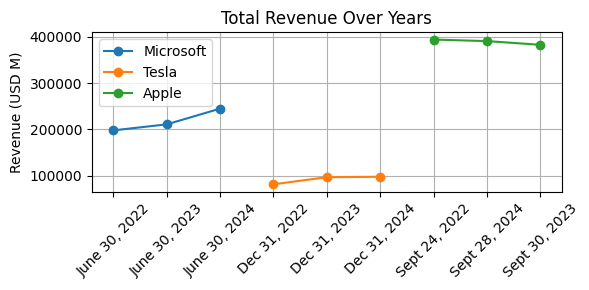

In [12]:
df_sorted = df.sort_values("Fiscal Year Ending")
plt.figure(figsize=(6, 3))
for company in df["Company"].unique():
    subset = df_sorted[df_sorted["Company"] == company]
    plt.plot(subset["Fiscal Year Ending"], subset["Total Revenue (USD M)"], marker='o', label=company)
plt.xticks(rotation=45)
plt.title("Total Revenue Over Years")
plt.ylabel("Revenue (USD M)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

FINDINGS
Apple leads with the highest average and total revenue.

Microsoft shows consistent net income across years.

Tesla has the lowest revenue and net income but has shown strong YoY growth (except 2024, where profit dropped).

Only Apple has available data for Operating Cash Flow.